In [4]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import random
import warnings

# Dimensionality checks

In [6]:
df = np.load('/dtu/blackhole/1c/214044/Project_NEW/DeepLearning-P24/P12data/split_1/train_physionet2012_1.npy', allow_pickle = True)

In [12]:
# Define the base path
base_path = "/dtu/blackhole/1c/214044/Project_NEW/DeepLearning-P24/P12data/"

# Initialize a dictionary to store concatenated arrays
data_dict = {}

# Loop through split_1 to split_5
for i in range(1, 6):
    folder_name = f"split_{i}"
    folder_path = os.path.join(base_path, folder_name)
    
    # Check if the folder exists
    if not os.path.exists(folder_path):
        print(f"Folder {folder_path} does not exist. Skipping...")
        continue

    # List all .npy files in the folder
    npy_files = [f for f in os.listdir(folder_path) if f.endswith('.npy')]
    
    # Initialize a list to store arrays
    arrays = []
    
    for npy_file in npy_files:
        file_path = os.path.join(folder_path, npy_file)
        try:
            # Load the .npy file
            array = np.load(file_path, allow_pickle=True)
            arrays.append(array)
        except Exception as e:
            print(f"Error loading {file_path}: {e}")
    
    # Concatenate all arrays from the folder
    if arrays:
        concatenated_array = np.concatenate(arrays, axis=0)
        data_dict[folder_name] = concatenated_array
        print(f"Concatenated {len(arrays)} files in {folder_name}")
    else:
        print(f"No .npy files found in {folder_name}")

# Print a summary
print(f"Data dictionary keys: {list(data_dict.keys())}")

Concatenated 3 files in split_1
Concatenated 3 files in split_2
Concatenated 3 files in split_3
Concatenated 3 files in split_4
Concatenated 3 files in split_5
Data dictionary keys: ['split_1', 'split_2', 'split_3', 'split_4', 'split_5']


In [7]:
keys = df[0].keys()

for key in keys:
    print(f'{key}: {df[0][key].shape}')

ts_values: (74, 37)
ts_indicators: (74, 37)
ts_times: (74,)
static: (8,)
labels: ()


In [ ]:
maxim = 0
for i in range(len(df)):
    temp_len = df[i]['ts_values'].shape[0]
    if temp_len > maxim:
        maxim = temp_len

maxim

In [ ]:
def get_prime_factors(n):
    """Returns the prime factors of a given number."""
    prime_factors = []
    # Divide by 2 until n is odd
    while n % 2 == 0:
        prime_factors.append(2)
        n //= 2

    # Check for odd factors from 3 onwards
    factor = 3
    while factor * factor <= n:
        while n % factor == 0:
            prime_factors.append(factor)
            n //= factor
        factor += 2

    # If n is still greater than 2, it is prime
    if n > 2:
        prime_factors.append(n)

    return prime_factors

# Example usage
number = 56
print(f"Prime factors of {number}: {get_prime_factors(number)}")

In [ ]:
for i in range(len(df)):
    if df[i]['ts_values'].shape[0]==207:
        print(i)

In [ ]:
df[432]['static']

# EDA for full dataset

In [17]:
df = np.concatenate([data_dict[i] for i in data_dict.keys()], axis=0)

## Column Sparsities

In [19]:
# feature_names = {
#     0: "Albumin (g/dL)",
#     1: "ALP [Alkaline phosphatase (IU/L)]",
#     2: "ALT [Alanine transaminase (IU/L)]",
#     3: "AST [Aspartate transaminase (IU/L)]",
#     4: "Bilirubin (mg/dL)",
#     5: "BUN [Blood urea nitrogen (mg/dL)]",
#     6: "Cholesterol (mg/dL)",
#     7: "Creatinine [Serum creatinine (mg/dL)]",
#     8: "DiasABP [Invasive diastolic arterial blood pressure (mmHg)]",
#     9: "FiO2 [Fractional inspired O2 (0-1)]",
#     10: "GCS [Glasgow Coma Score (3-15)]",
#     11: "Glucose [Serum glucose (mg/dL)]",
#     12: "HCO3 [Serum bicarbonate (mmol/L)]",
#     13: "HCT [Hematocrit (%)]",
#     14: "HR [Heart rate (bpm)]",
#     15: "K [Serum potassium (mEq/L)]",
#     16: "Lactate (mmol/L)",
#     17: "Mg [Serum magnesium (mmol/L)]",
#     18: "MAP [Invasive mean arterial blood pressure (mmHg)]",
#     19: "MechVent [Mechanical ventilation respiration (0:false, or 1:true)]",
#     20: "Na [Serum sodium (mEq/L)]",
#     21: "NIDiasABP [Non-invasive diastolic arterial blood pressure (mmHg)]",
#     22: "NIMAP [Non-invasive mean arterial blood pressure (mmHg)]",
#     23: "NISysABP [Non-invasive systolic arterial blood pressure (mmHg)]",
#     24: "PaCO2 [partial pressure of arterial CO2 (mmHg)]",
#     25: "PaO2 [Partial pressure of arterial O2 (mmHg)]",
#     26: "pH [Arterial pH (0-14)]",
#     27: "Platelets (cells/nL)",
#     28: "RespRate [Respiration rate (bpm)]",
#     29: "SaO2 [O2 saturation in hemoglobin (%)]",
#     30: "SysABP [Invasive systolic arterial blood pressure (mmHg)]",
#     31: "Temp [Temperature (°C)]",
#     32: "TropI [Troponin-I (μg/L)]",
#     33: "TropT [Troponin-T (μg/L)]",
#     34: "Urine [Urine output (mL)]",
#     35: "WBC [White blood cell count (cells/nL)]",
#     36: "Weight (kg)"
# }
feature_names = {
    0: "Alb (g/dL)",
    1: "ALP (IU/L)",
    2: "ALT (IU/L)",
    3: "AST (IU/L)",
    4: "Bilirubin (mg/dL)",
    5: "BUN (mg/dL)",
    6: "Cholesterol (mg/dL)",
    7: "Creatinine (mg/dL)",
    8: "DiasABP (mmHg)",
    9: "FiO2 (0-1)",
    10: "GCS (3-15)",
    11: "Glucose (mg/dL)",
    12: "HCO3 (mmol/L)",
    13: "HCT (%)",
    14: "HR (bpm)",
    15: "K (mEq/L)",
    16: "Lactate (mmol/L)",
    17: "Mg (mmol/L)",
    18: "MAP (mmHg)",
    19: "MechVent (0-1)",
    20: "Na (mEq/L)",
    21: "NIDiasABP (mmHg)",
    22: "NIMAP (mmHg)",
    23: "NISysABP (mmHg)",
    24: "PaCO2 (mmHg)",
    25: "PaO2 (mmHg)",
    26: "pH (0-14)",
    27: "Platelets (cells/nL)",
    28: "RespRate (bpm)",
    29: "SaO2 (%)",
    30: "SysABP (mmHg)",
    31: "Temp (°C)",
    32: "TropI (μg/L)",
    33: "TropT (μg/L)",
    34: "Urine (mL)",
    35: "WBC (cells/nL)",
    36: "Weight (kg)"
}


In [20]:
# Iterate over each column in the time series data (assumed to be shape 37 in the example)
column_sparsities = []

for i in range(37):
    sparsity_per_column = []
    for j in range(df.shape[0]):
        # Calculate sparsity for column `i` in each row
        sparsity = sum(df[j]['ts_values'][:, i] == 0) / len(df[j]['ts_values'][:, i])
        sparsity_per_column.append(sparsity)
    # Calculate the average sparsity for column `i` across all rows
    column_sparsities.append(np.mean(sparsity_per_column))

# Convert results into a pandas DataFrame for a detailed report
sparsity_report = pd.DataFrame({
    'Column Index': range(37),
    'Average Sparsity': column_sparsities
})

# Print the report
sparsity_report['Variables'] = sparsity_report['Column Index'].map(feature_names)
print(sparsity_report)


# Calculate the overall average sparsity across all columns
overall_sparsity = np.mean(column_sparsities)
print(f"Overall Average Sparsity: {overall_sparsity:.2%}")

    Column Index  Average Sparsity             Variables
0              0          0.563769            Alb (g/dL)
1              1          0.988067            ALP (IU/L)
2              2          0.987672            ALT (IU/L)
3              3          0.987668            AST (IU/L)
4              4          0.990577     Bilirubin (mg/dL)
5              5          0.947215           BUN (mg/dL)
6              6          0.987549   Cholesterol (mg/dL)
7              7          0.998570    Creatinine (mg/dL)
8              8          0.946970        DiasABP (mmHg)
9              9          0.561898            FiO2 (0-1)
10            10          0.902043            GCS (3-15)
11            11          0.781489       Glucose (mg/dL)
12            12          0.949521         HCO3 (mmol/L)
13            13          0.948215               HCT (%)
14            14          0.933015              HR (bpm)
15            15          0.232412             K (mEq/L)
16            16          0.943

In [ ]:
print(sparsity_report.sort_values('Average Sparsity'))


    Column Index  Average Sparsity             Variables
15            15          0.232412             K (mEq/L)
34            34          0.541637            Urine (mL)
30            30          0.561773         SysABP (mmHg)
9              9          0.561898            FiO2 (0-1)
0              0          0.563769            Alb (g/dL)
18            18          0.567278            MAP (mmHg)
23            23          0.626758       NISysABP (mmHg)
21            21          0.627063      NIDiasABP (mmHg)
22            22          0.632708          NIMAP (mmHg)
31            31          0.729281             Temp (°C)
28            28          0.770994        RespRate (bpm)
11            11          0.781489       Glucose (mg/dL)
10            10          0.902043            GCS (3-15)
36            36          0.928933           Weight (kg)
25            25          0.932021           PaO2 (mmHg)
26            26          0.932176             pH (0-14)
14            14          0.933

# Plots here

## Simple plots

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/zhome/b0/3/214044/miniconda3/envs/mamba_p12/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3550, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_607481/821965441.py", line 32, in <module>
    sns.lineplot(data=plot_data_melted, x='Time', y='Value', hue='Variable', linewidth=2)
  File "/zhome/b0/3/214044/miniconda3/envs/mamba_p12/lib/python3.9/site-packages/seaborn/relational.py", line 515, in lineplot
    p.plot(ax, kwargs)
  File "/zhome/b0/3/214044/miniconda3/envs/mamba_p12/lib/python3.9/site-packages/seaborn/relational.py", line 276, in plot
    for sub_vars, sub_data in self.iter_data(grouping_vars, from_comp_data=True):
  File "/zhome/b0/3/214044/miniconda3/envs/mamba_p12/lib/python3.9/site-packages/seaborn/_base.py", line 902, in iter_data
    data = self.comp_data
  File "/zhome/b0/3/214044/miniconda3/envs/mamba_p12/lib/python3.9/site-packages/seaborn/_base.py", line 993, in

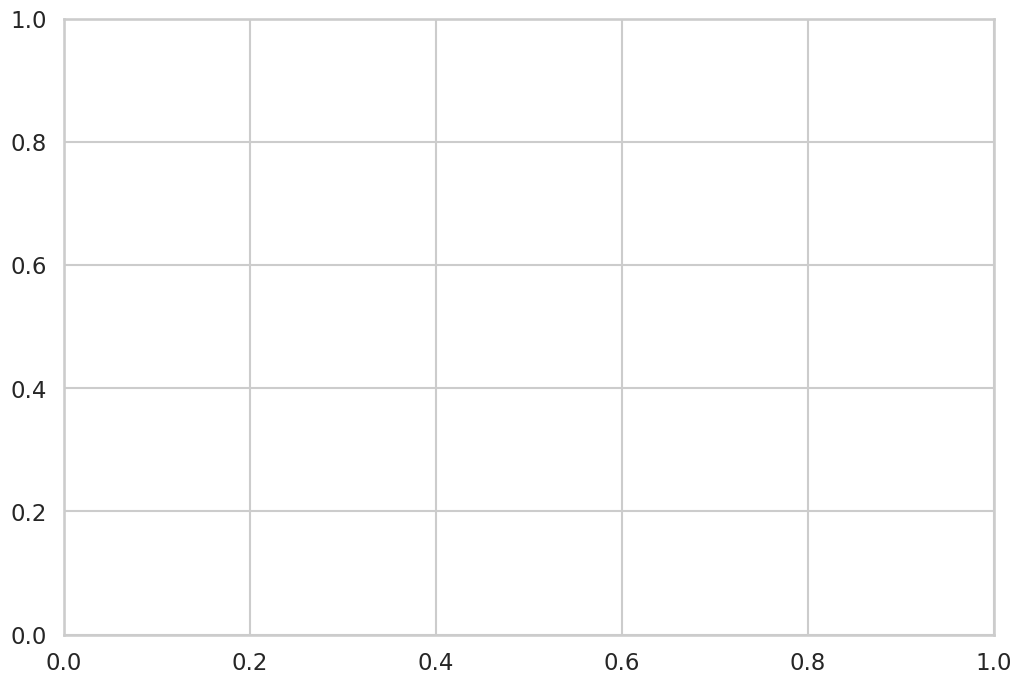

In [ ]:
warnings.filterwarnings('ignore')

NUMBER_OF_SELECTED_VARIABLES_SHOWN = 10

# Set a Seaborn theme and context for a clean, modern style
sns.set_theme(style="whitegrid", context="talk", palette="viridis")

random_index = random.randint(0, df.shape[0] - 1)
# Extract the data
ts_values = df[random_index]['ts_values']
ts_times = df[random_index]['ts_times']

# Create a DataFrame for plotting
selected_columns = random.sample(range(0, 37), NUMBER_OF_SELECTED_VARIABLES_SHOWN)

# Map selected indices to their feature names
selected_feature_names = [feature_names[col] for col in selected_columns]

# Create a DataFrame for plotting with descriptive column names
plot_data = pd.DataFrame(ts_values[:, selected_columns],
                         columns=selected_feature_names)
plot_data['Time'] = ts_times

# Melt the DataFrame to long format for seaborn
plot_data_melted = plot_data.melt(id_vars='Time',
                                  var_name='Variable',
                                  value_name='Value')
plot_data_melted = plot_data_melted.replace([np.inf, -np.inf], np.nan)  # Replace infinities with NaN
plot_data_melted = plot_data_melted.fillna(0)  
# Create the plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=plot_data_melted, x='Time', y='Value', hue='Variable', linewidth=2)

# Add a descriptive title and label axes with larger fonts
plt.title(f'Time Series Plot for patient {random_index}', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Time (0-48 hours)', fontsize=14)
plt.ylabel('Measurement value', fontsize=14)

# Move the legend below the plot
plt.legend(
    title='Variable', 
    bbox_to_anchor=(0.5, -0.1), 
    loc='lower right', 
    borderaxespad=0, 
    fontsize=8, 
    title_fontsize=10, 
    ncol=2  # Optional: adjust the number of columns in the legend
)

# Remove unnecessary top and right spines
sns.despine()

# Adjust layout so that everything fits nicely
plt.tight_layout()

plt.show()

## 9 plots of all sensors

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/zhome/b0/3/214044/miniconda3/envs/mamba_p12/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3550, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_607481/2139157906.py", line 77, in <module>
    sns.lineplot(
  File "/zhome/b0/3/214044/miniconda3/envs/mamba_p12/lib/python3.9/site-packages/seaborn/relational.py", line 515, in lineplot
    p.plot(ax, kwargs)
  File "/zhome/b0/3/214044/miniconda3/envs/mamba_p12/lib/python3.9/site-packages/seaborn/relational.py", line 276, in plot
    for sub_vars, sub_data in self.iter_data(grouping_vars, from_comp_data=True):
  File "/zhome/b0/3/214044/miniconda3/envs/mamba_p12/lib/python3.9/site-packages/seaborn/_base.py", line 902, in iter_data
    data = self.comp_data
  File "/zhome/b0/3/214044/miniconda3/envs/mamba_p12/lib/python3.9/site-packages/seaborn/_base.py", line 993, in comp_data
    orig = orig.mask(orig.isin([np.inf, -np.inf]), np.nan)
 

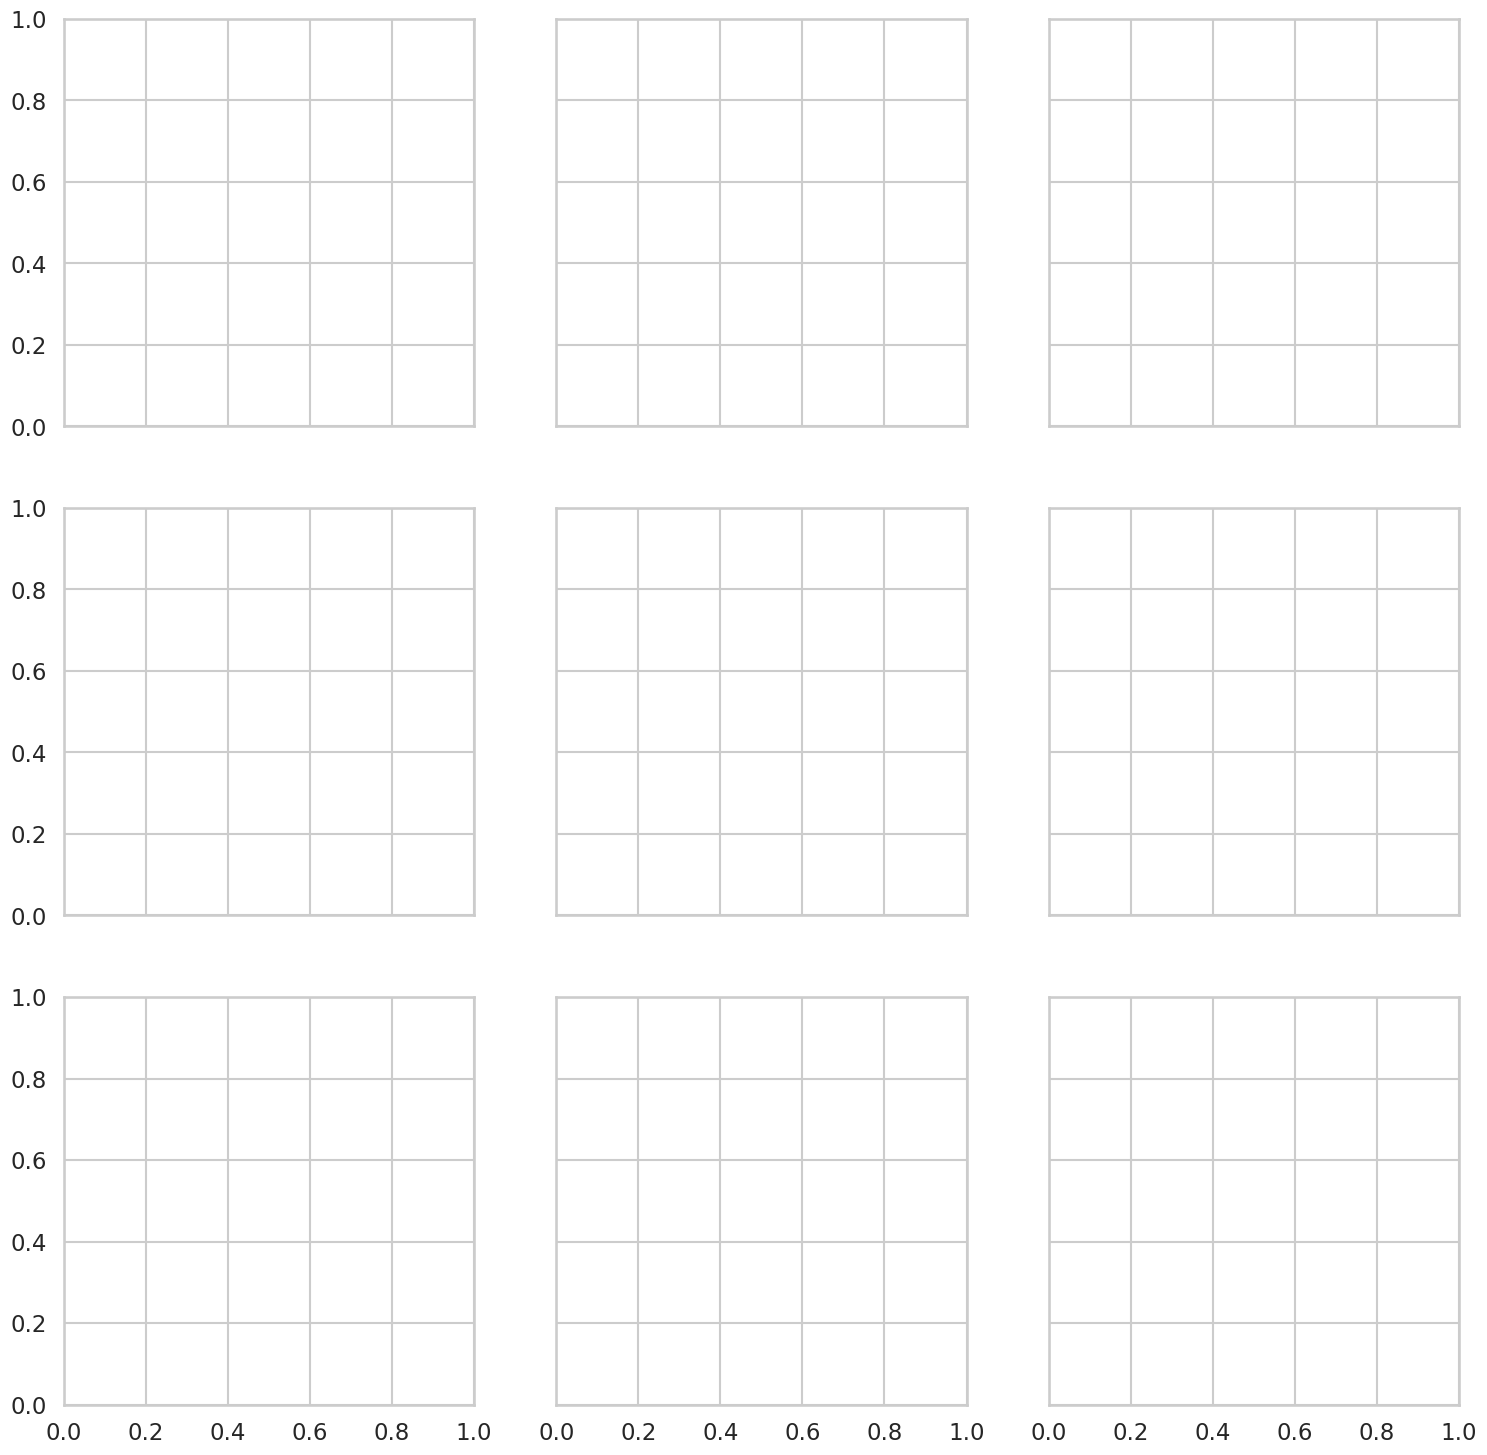

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random

# Constants
NUMBER_OF_VARIABLES = 37
VARIABLES_PER_PLOT = 4
TOTAL_PLOTS = 9

# Randomly select some data (for demonstration purposes)
random_index = random.randint(0, df.shape[0] - 1)
ts_values = df[random_index]['ts_values']
ts_times = df[random_index]['ts_times']

# Generate selected variables and divide into chunks for 9 plots
selected_columns = list(range(NUMBER_OF_VARIABLES))  # Using all variables

# Shuffle the variables to ensure randomness
random.shuffle(selected_columns)

# Split the shuffled list into 9 batches
variable_chunks = np.array_split(selected_columns, 9)

# Convert numpy arrays back to lists (optional, depending on your use case)
variable_chunks = [list(chunk) for chunk in variable_chunks]

# Create a 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(18, 18), sharex=True, sharey=True)
axes = axes.flatten()

# Loop through the grid and plot
for idx, ax in enumerate(axes):


    if idx >= len(variable_chunks):
        ax.axis("off")  # Turn off extra plots
        continue

    # Select variables for this plot
    chunk = variable_chunks[idx]
    selected_feature_names = [feature_names[col] for col in chunk]

    # Create a DataFrame for plotting
    plot_data = pd.DataFrame(ts_values[:, chunk],
                             columns=selected_feature_names)
    plot_data['Time (0-48 hours)'] = ts_times

    # Melt the DataFrame to long format for seaborn
    plot_data_melted = plot_data.melt(
        id_vars='Time (0-48 hours)',
        # value_vars=chunk,
        var_name='Variable',
        value_name='Measurement value'
    )

    # Set different color palette for each plot
    # Define a vivid custom palette with HEX or RGB colors
    custom_palette = [
    "#8229DE",  # Light Teal Blue
    "#A51FF0",  # Lighter Pink
    "#D242FF",  # Light Green
    "#72ECF6",  # Light Orange
    "#20D4F6",  # Light Purple
    "#3856E7",  # Lighter Turquoise
    # "#FFE7A2",  # Soft Yellow-Orange
    "#FAD4CF",  # Peachy Pink
    # "#B1C4D8",  # Muted Light Navy
    "#E8DFF0"   # Soft Lavender
]

# # Set the Seaborn palette
    palette = sns.color_palette(custom_palette)
    
    # Create the line plot for the current chunk
    sns.lineplot(
        data=plot_data_melted, 
        x='Time (0-48 hours)', 
        y='Measurement value', 
        # hue='Variable', 
        ax=ax, 
        linewidth=2,
        hue="Variable", palette=palette
    )

    # Move the legend to the upper center with a semi-transparent background
    legend = ax.legend(
        title='Variables',
        loc='upper center',
        bbox_to_anchor=(0.5, 0.95),
        fontsize=8,
        title_fontsize=10,
        ncol=2
    )
    legend.get_frame().set_alpha(0.7)

# Add overall layout adjustments
fig.suptitle(f"Time Series Plots for patient {random_index}", fontsize=20, fontweight="bold", y=1.02)
plt.tight_layout()
plt.show()

# Irrelevant

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Extract time series values
all_ts_values = [instance['ts_values'] for instance in df]

# Ensure all time series have the same length by padding or truncating
max_length = max(ts.shape[0] for ts in all_ts_values)
ts_padded = np.array([
    np.pad(ts, ((0, max_length - ts.shape[0]), (0, 0)), constant_values=0) if ts.shape[0] < max_length else ts[:max_length]
    for ts in all_ts_values
])

# Compute the mean across time for clustering features
ts_features = ts_padded.mean(axis=1)

# Perform k-means clustering
n_clusters = 3  # Define the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(ts_features)

# Plot cluster centroids
plt.figure(figsize=(12, 6))
for cluster_idx in range(n_clusters):
    centroid = kmeans.cluster_centers_[cluster_idx]
    plt.plot(centroid, label=f"Cluster {cluster_idx + 1}")

plt.title("Cluster Centroids")
plt.xlabel("Features (or Time)")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()

# Plot example time series for each cluster
plt.figure(figsize=(12, 8))
for cluster_idx in range(n_clusters):
    cluster_ts = ts_padded[labels == cluster_idx][:5]  # Show up to 5 examples per cluster
    for ts in cluster_ts:
        plt.plot(ts.mean(axis=1), alpha=0.7, label=f"Cluster {cluster_idx + 1}")

plt.title("Sample Time Series from Each Cluster")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract labels from the dataset
labels = [entry['labels'] for entry in df]

# Count the distribution of labels
label_counts = pd.Series(labels).value_counts().sort_index()

# Plot the distribution of labels
plt.figure(figsize=(6, 4))
label_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Label Distribution', fontsize=14)
plt.xlabel('Labels', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
